In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
#Create random lat_lngs
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add lat_lngs to a list
coordinates = list(lat_lngs)

In [4]:
#Create a list
cities = []
#Identidfy nearest cities
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique then add to the list
    if city not in cities:
        cities.append(city)
#Print city count
len(cities)        

618

In [5]:
#Create Url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning
print("Beginning Data Retrieval     ")
print("-----------------------------")
#Create counters
record_count = 1
set_count = 1
#Loop through list of cities
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kupang
Processing Record 2 of Set 1 | abong mbang
Processing Record 3 of Set 1 | waddan
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | puerto carreno
Processing Record 6 of Set 1 | karlshamn
Processing Record 7 of Set 1 | tessalit
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | swan river
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | torbat-e jam
Processing Record 20 of Set 1 | passo de camaragibe
P

Processing Record 36 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | tual
Processing Record 39 of Set 4 | alexandria
Processing Record 40 of Set 4 | placido de castro
Processing Record 41 of Set 4 | iwanai
Processing Record 42 of Set 4 | yaan
Processing Record 43 of Set 4 | vokhma
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | coahuayana
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | mataura
Processing Record 49 of Set 4 | kautokeino
Processing Record 50 of Set 4 | obihiro
Processing Record 1 of Set 5 | bereda
Processing Record 2 of Set 5 | toungoo
City not found. Skipping...
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | eregli
Processing Record 5 of Set 5 | chunoyar
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | oranjemund
Processing Record 8 of Set 5 | east london
Processin

Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | uyovu
Processing Record 31 of Set 8 | port-cartier
Processing Record 32 of Set 8 | dalvik
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | harper
Processing Record 35 of Set 8 | shimoda
Processing Record 36 of Set 8 | sioux lookout
Processing Record 37 of Set 8 | aksarka
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | aitape
Processing Record 40 of Set 8 | amalapuram
Processing Record 41 of Set 8 | brownwood
Processing Record 42 of Set 8 | khvoynaya
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | sirsa
Processing Record 45 of Set 8 | te anau
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | prince rupert
Processing Record 49 of Set 8 | ahuimanu
Processing Record 50 of Set 8 | maniitsoq
Processing Record 1 of Set 9 | tilichiki
Processing Record 2 of Set 9 | 

Processing Record 17 of Set 12 | ankazoabo
Processing Record 18 of Set 12 | am timan
Processing Record 19 of Set 12 | gushikawa
Processing Record 20 of Set 12 | doha
Processing Record 21 of Set 12 | lengshuijiang
Processing Record 22 of Set 12 | toamasina
Processing Record 23 of Set 12 | nikki
Processing Record 24 of Set 12 | beyneu
Processing Record 25 of Set 12 | wajir
Processing Record 26 of Set 12 | clovis
Processing Record 27 of Set 12 | piacabucu
Processing Record 28 of Set 12 | baherden
Processing Record 29 of Set 12 | kabinda
Processing Record 30 of Set 12 | camana
Processing Record 31 of Set 12 | kanigoro
Processing Record 32 of Set 12 | kaabong
Processing Record 33 of Set 12 | yenagoa
Processing Record 34 of Set 12 | abha
Processing Record 35 of Set 12 | piritiba
Processing Record 36 of Set 12 | nautla
Processing Record 37 of Set 12 | kushima
Processing Record 38 of Set 12 | aksu
Processing Record 39 of Set 12 | vardo
Processing Record 40 of Set 12 | shu
Processing Record 41 

In [9]:
#Total Count
len(city_data)

571

In [10]:
#Convert array of dictionaries to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kupang,-10.1667,123.5833,79.99,85,100,13.51,ID,2022-01-30 16:05:19
1,Abong Mbang,3.9833,13.1833,92.08,14,87,3.65,CM,2022-01-30 16:10:16
2,Waddan,29.1614,16.1390,54.59,43,29,13.80,LY,2022-01-30 16:10:17
3,Busselton,-33.6500,115.3333,66.09,76,0,18.14,AU,2022-01-30 16:11:03
4,Puerto Carreno,6.1890,-67.4859,91.36,31,71,13.62,CO,2022-01-30 16:10:04
5,Karlshamn,56.1706,14.8619,41.49,51,6,21.47,SE,2022-01-30 16:11:04
6,Tessalit,20.1986,1.0114,84.20,10,4,13.91,ML,2022-01-30 16:10:18
7,Swan River,52.1058,-101.2676,18.66,91,100,4.38,CA,2022-01-30 16:11:05
8,Georgetown,5.4112,100.3354,84.13,80,20,0.00,MY,2022-01-30 16:08:59
9,Kapaa,22.0752,-159.3190,71.92,78,20,14.97,US,2022-01-30 16:10:19


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
#Reorder columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kupang,ID,2022-01-30 16:05:19,-10.1667,123.5833,79.99,85,100,13.51
1,Abong Mbang,CM,2022-01-30 16:10:16,3.9833,13.1833,92.08,14,87,3.65
2,Waddan,LY,2022-01-30 16:10:17,29.1614,16.1390,54.59,43,29,13.80
3,Busselton,AU,2022-01-30 16:11:03,-33.6500,115.3333,66.09,76,0,18.14
4,Puerto Carreno,CO,2022-01-30 16:10:04,6.1890,-67.4859,91.36,31,71,13.62
5,Karlshamn,SE,2022-01-30 16:11:04,56.1706,14.8619,41.49,51,6,21.47
6,Tessalit,ML,2022-01-30 16:10:18,20.1986,1.0114,84.20,10,4,13.91
7,Swan River,CA,2022-01-30 16:11:05,52.1058,-101.2676,18.66,91,100,4.38
8,Georgetown,MY,2022-01-30 16:08:59,5.4112,100.3354,84.13,80,20,0.00
9,Kapaa,US,2022-01-30 16:10:19,22.0752,-159.3190,71.92,78,20,14.97


In [17]:
#Create a CSV output
output_data_file = "weather_data/cities.csv"
#Export
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#Relevant fieleds form city data for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

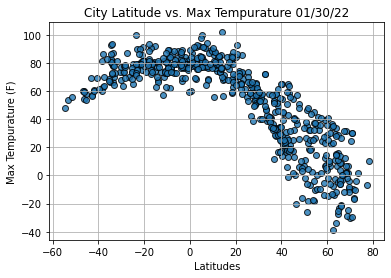

In [21]:
#Import time module
import time
#Build scatter plot lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Tempurature "+time.strftime("%x"))
plt.ylabel("Max Tempurature (F)")
plt.xlabel("Latitudes")
plt.grid(True)
#Save figure
plt.savefig("weather_data/Fig1.png")
#Show Plot
plt.show()

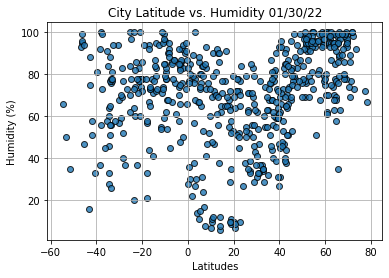

In [27]:
#Import time module
import time
#Build scatter plot lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitudes")
plt.grid(True)
#Save figure
plt.savefig("weather_data/Fig2.png")
#Show Plot
plt.show()

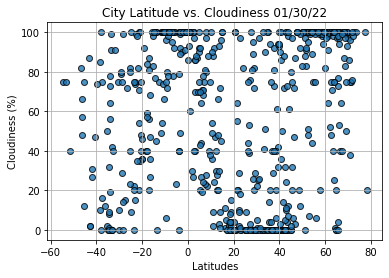

In [28]:
#Import time module
import time
#Build scatter plot lat vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitudes")
plt.grid(True)
#Save figure
plt.savefig("weather_data/Fig3.png")
#Show Plot
plt.show()

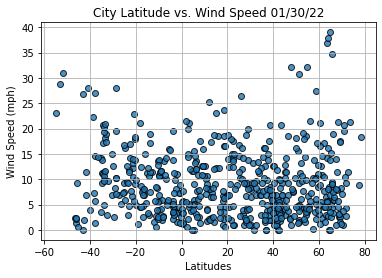

In [29]:
#Import time module
import time
#Build scatter plot lat vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitudes")
plt.grid(True)
#Save figure
plt.savefig("weather_data/Fig4.png")
#Show Plot
plt.show()

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [68]:
#Create northern hemisphere df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

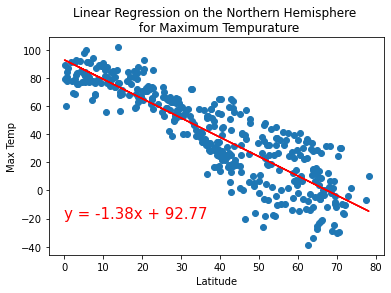

In [88]:
#Linear regression on Norther Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call Function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Tempurature', 'Max Temp',(0,-20))

In [96]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: -0.879
The standard error is: 0.037


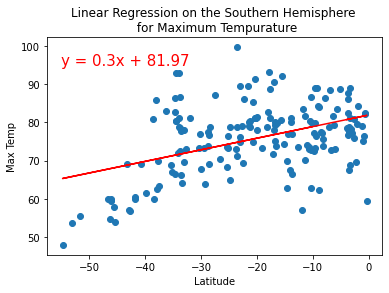

In [97]:
#Linear regression on southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Tempurature', 'Max Temp',(-55,95))

In [98]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: 0.441
The standard error is: 0.047


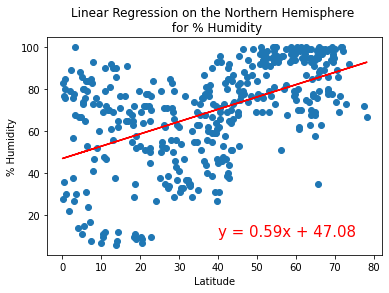

In [99]:
#Linear regression on Northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [100]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: 0.517
The standard error is: 0.049


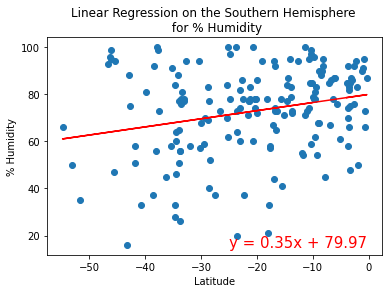

In [102]:
#Linear regression on southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

In [103]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.001
The r-value is: 0.248
The standard error is: 0.103


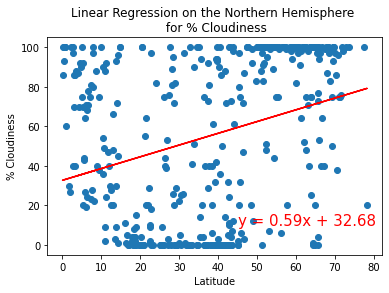

In [104]:
#Linear regression on Northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

In [105]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: 0.305
The standard error is: 0.093


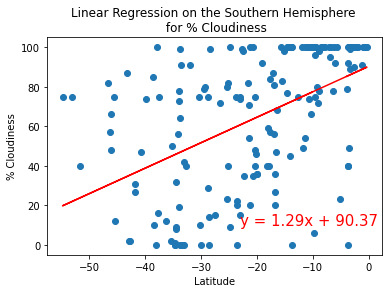

In [106]:
#Linear regression on southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-23,10))

In [107]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: 0.492
The standard error is: 0.174


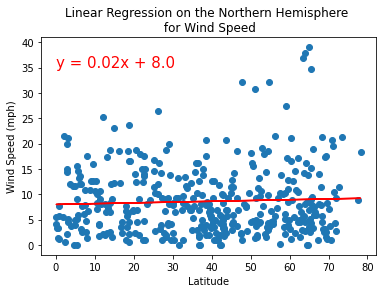

In [108]:
#Linear regression on Northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,35))

In [109]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.332
The r-value is: 0.049
The standard error is: 0.016


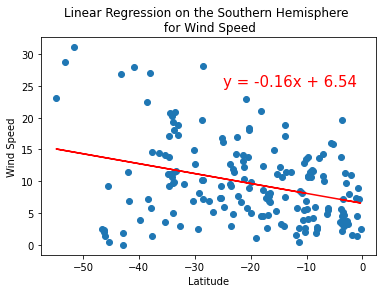

In [110]:
#Linear regression on southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Plot
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))

In [111]:
# Find stats values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-Value is: {p_value:.3f}")    
print(f"The r-value is: {r_value:.3f}")
print(f"The standard error is: {std_err:.3f}")

The p-Value is: 0.000
The r-value is: -0.324
The standard error is: 0.035
